In [2]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser_simulation import Simulation
from pulser.devices import MockDevice
from pulser.waveforms import RampWaveform, ConstantWaveform

import matplotlib.pyplot as plt

import qutip

In [3]:
# Define a dictionary where each key is the name of the qubit,
# and each value is the qubit's position (in um)

qubit_positions = {
    'q0': (0, 0),
    'q1': (3, 5.2),
    'q2': (6, 0),
    'q3': (9, -5.2),
    'q4': (9, 0),
    'q5': (9, 5.2),
    'q6': (9, 10.4),
    'q7': (12, 0),
}

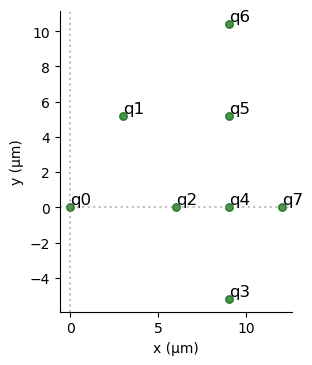

In [4]:
# Arrangements of qubits on the machine are called a register
# Define a register in Pulser by passing the qubit dictionary

reg = Register(qubit_positions)
reg.draw()

In [5]:
# Define the maximum Rabi frequency by imposing a blockade radius
# (units are um for the blockade radius and rad/us for the rabi frequency)

blockade_radius = 8.7
Omega_max = MockDevice.rabi_from_blockade(blockade_radius)
print(Omega_max)

12.499610303500795


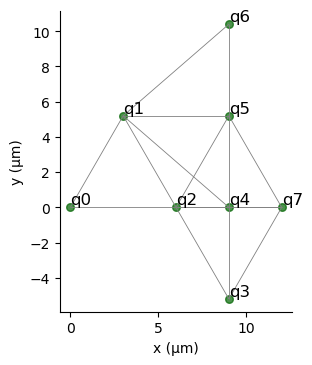

In [6]:
# Visualize the edges induced by the chosen blockade radius

reg.draw(blockade_radius=blockade_radius)

In [7]:
# Find a coloring of the graph by using the greedy algorithm explained before

# Useful things to know:

# Extract coordinates of qubits from a register:
coords = reg._coords

# Extract names of qubits from a register:
ids = reg.qubit_ids

# Create a register from coordinates and qubit ids:
new_reg = Register.from_coordinates(coords, labels=ids)